In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv

Points 
 [[0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]
H_1 
 [[2.  0.  0. ]
 [0.  2.  0. ]
 [0.3 0.5 1. ]]
H_2
 [[ 0.5    0.866  0.   ]
 [-0.866  0.5    0.   ]
 [ 0.     0.     1.   ]]
H_3 
 [[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
H_4 
 [[-1.     1.732  0.   ]
 [ 1.732  1.     0.   ]
 [-0.3    0.5    1.   ]]


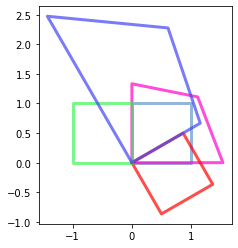

In [6]:

# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1) #In homogenous form
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
P = P/P[-1, :]  #divide by the last row to get inhomogeneous coordinates no use here idk why
P = np.insert(P,4,P[:,0],axis=1) 
x = P[0, :] #first row of P
y = P[1, :] #second row of P
print("Points \n", P) 
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)                                                                     

#Original points                            
ax.plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#First transformation 
H_1 = np.identity(3)
H_1[0,0] = 2
H_1[1,1] = 2
H_1[2, 0] = 0.3
H_1[2, 1] = 0.5
print("H_1 \n",H_1)
Pt_1 = np.matmul(H_1, P)
Pt_1 = Pt_1/Pt_1[-1, :]  #Converting to inhomogeneous coordinates
Pt_1 = np.insert(Pt_1,4,Pt_1[:,0],axis=1) #take the first column and append to the last, so the last point is plotted twice completing the square, omfg
xt_1 = Pt_1[0, :]
yt_1 = Pt_1[1, :]
ax.plot(xt_1, yt_1, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#Second transformation
t = np.pi/3
H_2 = np.array(([np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]))
print("H_2\n",H_2)
Pt_2 = np.matmul(H_2,P) 
Pt_2 = Pt_2/Pt_2[-1, :]
Pt_2 = np.insert(Pt_2,4,Pt_2[:,0],axis=1)  
xt_2 = Pt_2[0, :]
yt_2 = Pt_2[1, :]
ax.plot(xt_2, yt_2, color='#ff0100', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#third transformation
H_3 = np.array(([-1,0,0], [0,1,0], [0., 0., 1.]))
print("H_3 \n",H_3)
Pt_3 = np.matmul(H_3,P)
Pt_3 = Pt_3/Pt_3[-1, :]
Pt_3 = np.insert(Pt_3,4,Pt_3[:,0],axis=1)  
xt_3 = Pt_3[0, :]
yt_3 = Pt_3[1, :]
ax.plot(xt_3, yt_3, color='#42f55a', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#fourth transformation
H_4 = np.matmul(H_2,np.matmul(H_1,H_3))
print("H_4 \n",H_4)
Pt_4 = np.matmul(H_4,P)
Pt_4 = Pt_4/Pt_4[-1, :]
Pt_4 = np.insert(Pt_4,4,Pt_4[:,0],axis=1)  
xt_4 = Pt_4[0, :]
yt_4 = Pt_4[1, :]
ax.plot(xt_4, yt_4, color='#4245f5', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
plt.show()

In [18]:
im1.shape

(640, 800, 3)

In [11]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:  
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
(H, status) = cv.findHomography(p1, p2,0)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im4)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()
print(H)
cv.destroyAllWindows()

[[ 80.   9.]
 [610.  86.]
 [631. 414.]
 [382. 463.]
 [232. 378.]]
[[ 29. 141.]
 [344. 116.]
 [528. 360.]
 [466. 469.]
 [345. 443.]]


IndexError: index 5 is out of bounds for axis 0 with size 5

In [10]:
im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/assn2/graf/img2.ppm', cv.IMREAD_ANYCOLOR)
with open('images/assn2/graf/H1to2p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im5)
cv.waitKey(0)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.87976964, 0.31245438, -39.430589], [-0.18389418, 0.93847198, 153.15784], [0.00019641425, -1.6015275e-05, 1.0]]


In [17]:
path = 'C:/Users/menuw/Documents/Modules/Semester_4/EN2550_Computer_Vision/SuperGluePretrainedNetwork/dump_match_pairs/img1_img4_matches.npz'
npz = np.load(path)
threshold = 0.8
length = 0
for i in range(npz['matches'].shape[0]):
    if npz['match_confidence'][i] > threshold:
        length += 1
kp0 = np.empty((length,2),dtype='float32')
kp1 = np.empty((length,2),dtype ='float32')
j=0
for i in range(npz['keypoints0'].shape[0]):
    if npz['matches'][i] > -1:
        if npz['match_confidence'][i] > threshold:
            kp0[j][0]=npz['keypoints0'][i][0]
            kp0[j][1]=npz['keypoints0'][i][1]
            kp1[j][0]=npz['keypoints1'][npz['matches'][i]][0]
            kp1[j][1]=npz['keypoints1'][npz['matches'][i]][1]
            j +=1
(Homo, status) = cv.findHomography(kp0, kp1,cv.RANSAC,6)
#np.set_printoptions(precision=3)
print(Homo)
im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im5_warped = cv.warpPerspective(im2, np.linalg.inv(Homo), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1",im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 6.821e-01  6.976e-01 -3.750e+01]
 [-1.417e-01  9.874e-01  1.477e+02]
 [ 4.504e-04  4.625e-06  1.000e+00]]


In [14]:
print(npz['keypoints0'].shape)
print(npz['keypoints1'].shape)
print(npz['matches'].shape)
print(npz['match_confidence'].shape)

(1024, 2)
(1024, 2)
(1024,)
(1024,)


In [16]:
print(npz['matches'])


[13 -1 -1 ... -1 -1 -1]


In [19]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:  
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img2.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('images/assn2/graf/img6.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
im2copy = im2.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p3, im2copy]
n = 0

cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 2',draw_circle, param)

while(1):
    cv.imshow("Image 2", im2copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
print(p3)
(H1, status) = cv.findHomography(p1, p2,0)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H1), (900,900))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
#################################################
(H2, status) = cv.findHomography(p1, p3,0)
im2_warped = cv.warpPerspective(im2, np.linalg.inv(H2), (2000,2000))
im2_warped[0:im4_warped.shape[0], 0:im4_warped.shape[1]] = im4_warped
#################################################
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 2", im2)
cv.waitKey(0)
cv.namedWindow("Image 2 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.imshow("Image 2 Warped", im2_warped)
cv.waitKey(0)
cv.destroyAllWindows()
cv.destroyAllWindows()
print(H)
cv.destroyAllWindows()

[[ 79.  11.]
 [610.  87.]
 [632. 410.]
 [382. 460.]
 [234. 378.]]
[[ 35. 146.]
 [471. 110.]
 [577. 377.]
 [413. 483.]
 [271. 448.]]
[[462.   4.]
 [503. 234.]
 [346. 500.]
 [265. 509.]
 [275. 401.]]
[[ 6.944e-01  6.345e-01 -3.128e+01]
 [-1.280e-01  9.369e-01  1.484e+02]
 [ 5.085e-04 -1.289e-04  1.000e+00]]


<StemContainer object of 3 artists>

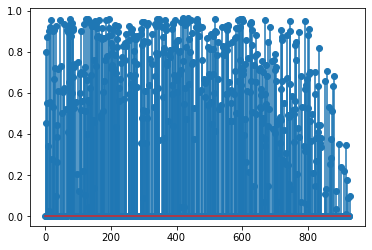

In [46]:
length = npz["match_confidence"].shape[0]
x= np.arange(0,length,1)
npz["match_confidence"]
plt.stem(x,npz["match_confidence"])